<h1> Project: Car Price Prediction </h1>

<p>The objective is to predict the price of the car using single/multiple features. Using Data Exploration, EDA, Visualization and building various models to arrive at accurate pricing of cars </p>

<p>The models used in this project are:</p>
<ul>
    <li><b>Multiple Linear Regression</b></li>
    <li><b>Polynomial Regression</b></li>
    


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data path
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2> Data Exploration </h2>

In [3]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [4]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
symboling            201 non-null int64
normalized-losses    201 non-null int64
make                 201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null float64
stroke               197 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-null float64
peak-rpm             201 non-n

In [6]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [7]:
df["stroke"].fillna(value=0,inplace=True)

In [8]:
df["stroke"].unique()

array([2.68, 3.47, 3.4 , 2.8 , 3.19, 3.39, 3.03, 3.11, 3.23, 3.46, 3.9 ,
       3.41, 3.07, 3.58, 4.17, 2.76, 3.15, 0.  , 3.16, 3.64, 3.1 , 3.35,
       3.12, 3.86, 3.29, 3.27, 3.52, 2.19, 3.21, 2.9 , 2.07, 2.36, 2.64,
       3.08, 3.5 , 3.54, 2.87])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
symboling            201 non-null int64
normalized-losses    201 non-null int64
make                 201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-null float64
peak-rpm             201 non-n

In [10]:
df["engine-location"].value_counts()

front    198
rear       3
Name: engine-location, dtype: int64

There are 198 vehicls out of 201 with front engine and only 3 cars with rear engines. There is no point checking the correlation of this feature to price based on this observation.

In [11]:
#Finding the Person Coefficient among the features
df[["engine-size","bore","stroke","compression-ratio","length", "width", "height","wheel-base","curb-weight","horsepower","peak-rpm","city-mpg","highway-mpg","price"]].corr()

,engine-size,bore,stroke,compression-ratio,length,width,height,wheel-base,curb-weight,horsepower,peak-rpm,city-mpg,highway-mpg,price
engine-size,1.000000,0.572609,0.270897,0.028889,0.685025,0.729436,0.074694,0.572027,0.849072,0.822676,-0.256733,-0.650546,-0.679571,0.872335
bore,0.572609,1.000000,-0.031141,0.001263,0.608971,0.544885,0.180449,0.493244,0.644060,0.566936,-0.267392,-0.582027,-0.591309,0.543155
stroke,0.270897,-0.031141,1.000000,0.129416,0.120142,0.118120,0.165201,0.157664,0.128143,0.036837,-0.252777,0.134658,0.112628,0.049628
compression-ratio,0.028889,0.001263,0.129416,1.000000,0.159733,0.189867,0.259737,0.250313,0.156433,-0.214514,-0.435780,0.331425,0.268465,0.071107
length,0.685025,0.608971,0.120142,0.159733,1.000000,0.857170,0.492063,0.876024,0.880665,0.579821,-0.285970,-0.665192,-0.698142,0.690628
width,0.729436,0.544885,0.118120,0.189867,0.857170,1.000000,0.306002,0.814507,0.866201,0.615077,-0.245800,-0.633531,-0.680635,0.751265
height,0.074694,0.180449,0.165201,0.259737,0.492063,0.306002,1.000000,0.590742,0.307581,-0.087027,-0.309974,-0.049800,-0.104812,0.135486
wheel-base,0.572027,0.493244,0.157664,0.250313,0.876024,0.814507,0.590742,1.000000,0.782097,0.371147,-0.360305,-0.470606,-0.543304,0.584642
curb-weight,0.849072,0.644060,0.128143,0.156433,0.880665,0.866201,0.307581,0.782097,1.000000,0.757976,-0.279361,-0.749543,-0.794889,0.834415
horsepower,0.822676,0.566936,0.036837,-0.214514,0.579821,0.615077,-0.087027,0.371147,0.757976,1.000000,0.107885,-0.822214,-0.804575,0.809575


<h2>Data Visualization</h2>

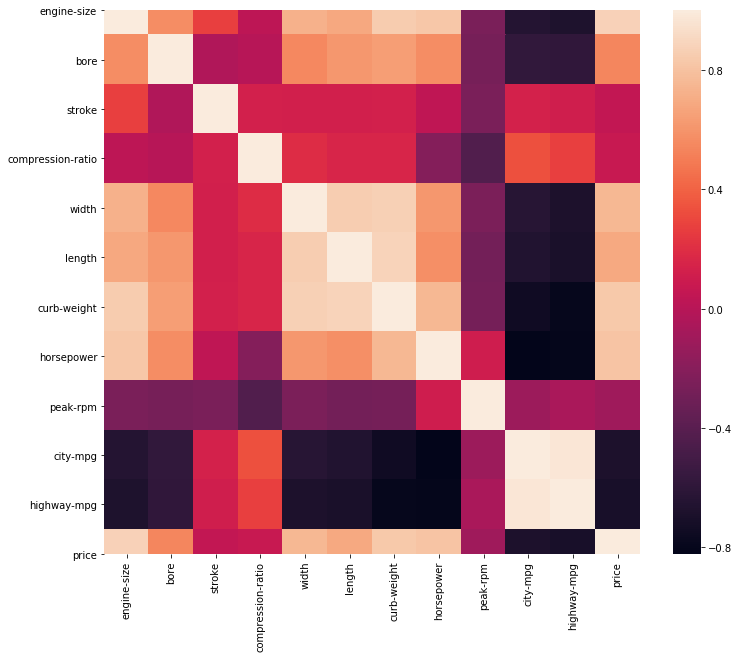

In [12]:
#Generating a heatmap of the Pearson Correlation Coefficient across various features in comparison with price
fig = plt.figure(figsize=(12,10))
sns.heatmap(df[["engine-size","bore","stroke","compression-ratio","width","length","curb-weight",
                "horsepower","peak-rpm","city-mpg","highway-mpg","price"]].corr())

Strong Positive Correlation observed for features: engine-size, curb-weight and horsepower<br>
Strong Negative Correlation observed for features: city-mpg and highway-mpg

Other features do not exhibit strong correlation with our output i.e. price

Now that 5 features have been identified from our data exploration and analysis, having a strong correlation to price. Exploring the linear relationship using data visualization

<h4>Regression Plots</h4>

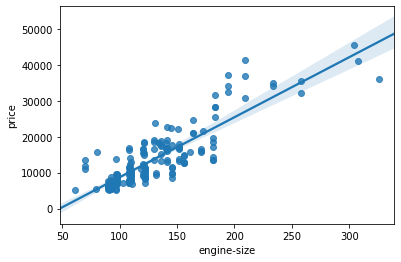

In [13]:
# Engine-size vs Price
sns.regplot(df["engine-size"],df["price"])

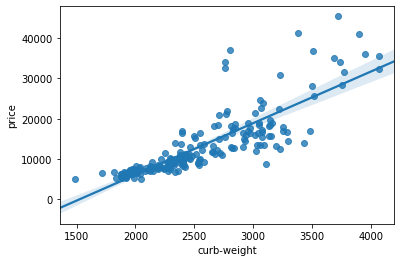

In [14]:
# Curb weight vs price
sns.regplot(df["curb-weight"],df["price"])

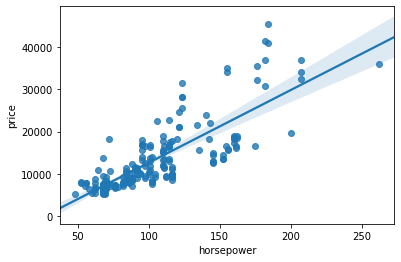

In [15]:
#horsepower vs price
sns.regplot(df["horsepower"],df["price"])

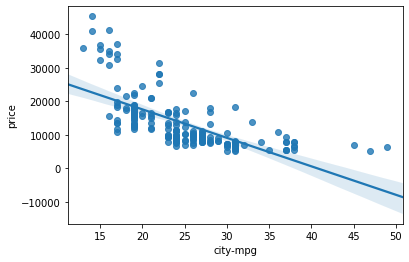

In [16]:
#City mpg vs price
sns.regplot(df["city-mpg"],df["price"])

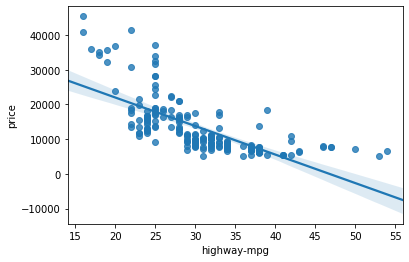

In [17]:
#highway mpg vs price
sns.regplot(df["highway-mpg"],df["price"])

<i> Observations:</i>

<p>It is clear that the features: engine-size and horsepower have a linear relationship with price. Whereas curb-weight, city-mpg and highway-mpg have curvilinear relationship with price. <p>

<h2>Model Development</h2>

<p> Bearing the observations so far, let's try two prediction models:<br>
    1. Multiple Linear Regression<br>
    2. Polynomial Regression<p>
        
<p> Objective is to find an accurate model based on the R Squared and MSE scores. <p>

<h3>01. Multiple Linear Regression </h3>

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
X = df[['engine-size','curb-weight','horsepower','city-mpg','highway-mpg']]
y = df['price']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
y_predicted = lm.predict(X_test)

Value of the intercept

In [24]:
lm.intercept_

-6016.906738986796

Value of the Slope

In [25]:
lm.coef_

array([  88.95720906,    3.50926364,   17.26083121, -147.83002825,
         20.01355151])

In [26]:
#Taking the actual and predicted values ina dataframe to do further analyse accuracy
mlr_act_pred = pd.DataFrame({"Actuals":y_test,"Predicted":y_predicted.flatten()})

In [27]:
print(mlr_act_pred)

     Actuals     Predicted
95    8249.0   7007.311807
15   41315.0  25652.950009
30    6855.0   6040.114304
158   9258.0   7960.202077
128  11850.0  13429.178587
..       ...           ...
140   9233.0  10327.871883
98   13499.0  21496.353054
173  11248.0  11698.662143
96    8949.0  11176.837657
170  10698.0   9956.947108

[61 rows x 2 columns]


Plotting a sample of predicted and actual prices on a bar plot

Text(0.5, 1.0, 'Multiple Linear Regression - Actuals vs Predicted Prices')

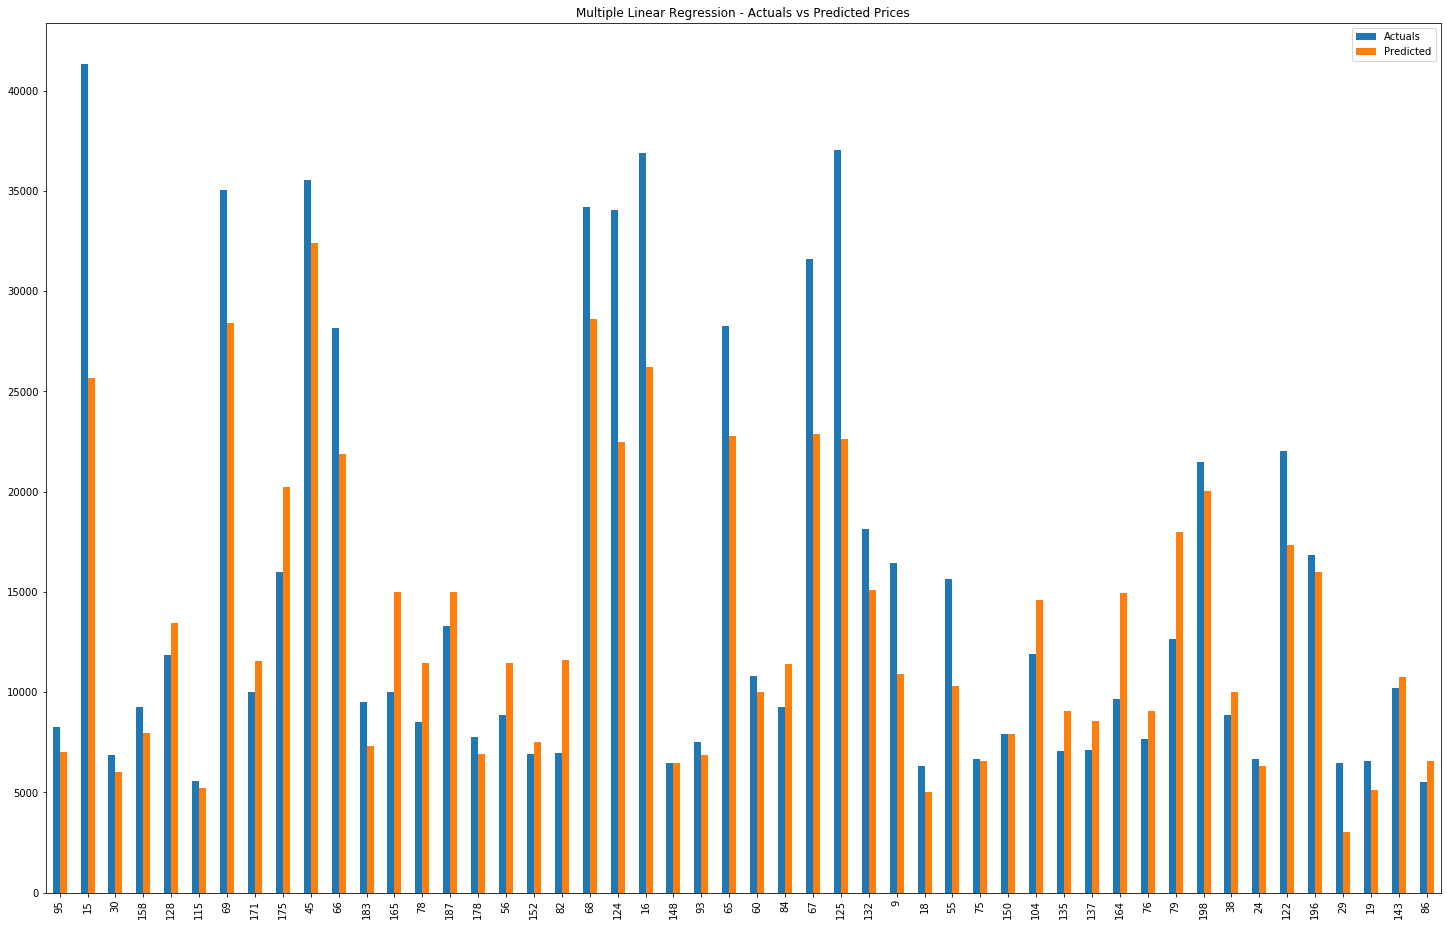

In [28]:
mlr_act_pred.head(50).plot(kind="bar",figsize=(25,16))
plt.title("Multiple Linear Regression - Actuals vs Predicted Prices")

<h4> 1.1 Accuracy Check </h4>

In [29]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [30]:
#R Squared Value
r2_score(mlr_act_pred["Actuals"],mlr_act_pred["Predicted"])

0.7714568010786043

In [31]:
#Mean Squared Error
mean_squared_error(mlr_act_pred["Actuals"],mlr_act_pred["Predicted"])

21663988.803818163

<p>R Squared Score is 77.14% which indicates good fit. We have the MSE at 21663988 </p>

<h4> 1.2 Model Evaluation using Visualization</h4>

Now that prediction is done using Multiple Linear Regression, let's validate if the model is correct in following linear relationship or if it actually has curvi-linear relationship.

import the visualization package: seaborn

In [32]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

<h4> Regression Plot </h4>

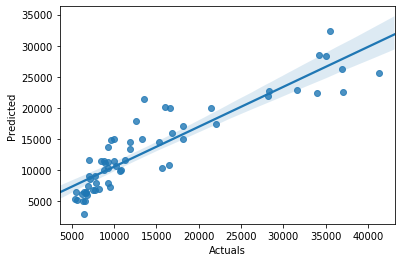

In [33]:
sns.regplot(mlr_act_pred["Actuals"],mlr_act_pred["Predicted"])

<h4>Residual Plot</h4>

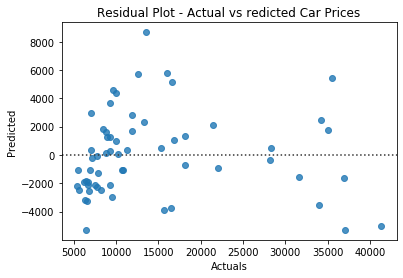

In [34]:
sns.residplot(mlr_act_pred["Actuals"],mlr_act_pred["Predicted"])
plt.title("Residual Plot - Actual vs redicted Car Prices")
plt.show()

<i>Residual Plot Observations</i>

<p>We can see from this residual plot that the residuals are not clearly randomly spread around the x-axis, which leads us to believe that the linear model selected is not accurate for this data.</p>

<h4>Distribution plot</h4>

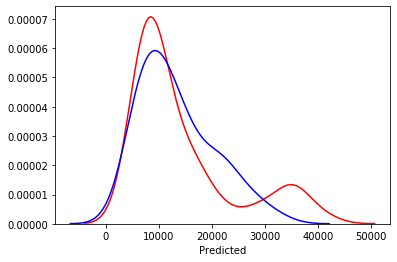

In [35]:
# Generating distribution plot of actuals vs predicted car prices
sns.distplot(mlr_act_pred["Actuals"],hist=False,color='red')
sns.distplot(mlr_act_pred["Predicted"],hist=False,color='blue')

<i> Distribution Plot Observations </i>
<p> There is a fair overlap between the actual and predicted prices confirming the accuracy of our model as noted from the R Squared score previously. The values from 42,000 to 51,000 are not in line but that is understandable as there is no data in that range. However the accuracy of prediction is not great</p>

<i>Summary of Observations</i>
<p> We earlier already saw that out of the 5 features displaying strong correlation to price, 3 had a non linear relationship.
This fact along with the observations from the Multiple Linear Regression Model fit leads us to Polynomial Regression in search of better accuracy <p> 

<h3>2. Polynomial Regression </h3>

In [36]:
#import modules
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [37]:
#Function to predict using Polynomial Transformation and linear regression using Pipeline
def Polypipeline(scale = StandardScaler, order = 2,model = LinearRegression, test_size=0.2):
    '''
    This function takes in arguments for scale, polynomial degree/order, model and test_size.
    Pipeline is built using the arguments and model prediction is done. The output is a 
    dataframe with the actual and predicted values.
    '''
    #Using Pipeline to normalize, perform polynomial transformation and fit using Linear Regression model
    Input = [('scale',scale()),('polynomial',PolynomialFeatures(degree=order)),('model', model())]
    pipe = Pipeline(Input)
    #Taking the 5 features strongly correlated to price as X
    X = df[['engine-size',"curb-weight",'horsepower','city-mpg','highway-mpg']]
    y = df["price"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    #Fit & Predict
    pipe.fit(X_train,y_train)
    y_predicted_poly = pipe.predict(X_test)
    #Storing the actual prices and predicted prices in dataframe
    test_actuals_predicted = pd.DataFrame({"Actuals":y_test, "Predicted":y_predicted_poly.flatten()})
    return(test_actuals_predicted)    

<h4>2.1 Accuracy Score </h4>

In [38]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [39]:
#Function to calculate R Squared and MSE
def r2_mse_scores(df):
    '''
    This function takes a dataframe with actual and predicted values as input.
    Objective is to check the accuracy of prediction model by computing and returning the 
    R-Squared and Mean Squared Error.
    '''
    r2 = r2_score(df["Actuals"],df["Predicted"])
    mse = mean_squared_error(df["Actuals"],df["Predicted"])
    return(r2,mse)

<p>Looping through to get the prediction for various degrees of Polynomial regression and their accuracy scores using R Squared and MSE scores.</p>

In [40]:
for var in np.arange(2,10,1):
    act_pred_poly = Polypipeline(scale=StandardScaler,order=var,model=LinearRegression,test_size=0.3)
    r2,mse = r2_mse_scores(act_pred_poly)
    print("R Squared score and MSE for Polynomial degree of ",var," are -","r2: ",r2,", mse: ", mse )

R Squared score and MSE for Polynomial degree of  2  are - r2:  0.7911043759604467 , mse:  19801562.6004954
R Squared score and MSE for Polynomial degree of  3  are - r2:  0.1181480147354751 , mse:  83592212.0
R Squared score and MSE for Polynomial degree of  4  are - r2:  -8990258.635884618 , mse:  852201618837974.8
R Squared score and MSE for Polynomial degree of  5  are - r2:  -465319769547.4594 , mse:  4.410843256447191e+19
R Squared score and MSE for Polynomial degree of  6  are - r2:  -475422407621.4114 , mse:  4.506607838003781e+19
R Squared score and MSE for Polynomial degree of  7  are - r2:  -1646288656496.6665 , mse:  1.560544316809219e+20
R Squared score and MSE for Polynomial degree of  8  are - r2:  -4612314919434.717 , mse:  4.372089795098445e+20
R Squared score and MSE for Polynomial degree of  9  are - r2:  -17807437393479.98 , mse:  1.687996519422783e+21


<p> From the above, it is clear that degree 2, gives the best R Squared value of 79.11%.
Hence for an optimal model using the current data set , we should go with 2nd degree Polynomial regression. </p>


<h4>2.2 Model Evaluation using Visualization </h4>

In [41]:
#Model output when degree is chosen as 5.
act_pred_poly = Polypipeline(scale=StandardScaler,order=2,model=LinearRegression,test_size=0.3)

Distribution Plot

Text(0.5, 1.0, 'Actuals vs Predicted Prices Distribution')

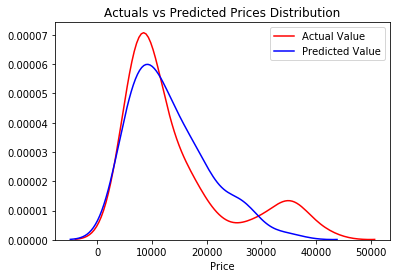

In [42]:
sns.distplot(act_pred_poly["Actuals"],hist=False, color="r", label = "Actual Value")
sns.distplot(act_pred_poly["Predicted"],hist=False, color="b", label = "Predicted Value")
plt.xlabel("Price")
plt.title("Actuals vs Predicted Prices Distribution")

<h3>Multiple Linear Regression (MLR) vs Polynomial Fit</h3>

<ul>
    <li><b>MSE</b>: The MSE for Polynomial fit is smaller than the MSE for MLR Fit.</li>
    <li><b>R-squared</b>: The R-squared for Polynomial is also larger at 79.11 as opposed to 77.14 for MLR Fit.</li>
</ul>

<h2>Conclusion:</h2>

<p>Comparing these two models, the Polynomial model appears to be the best model to be able to predict price from our dataset. </p>